In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tools import plot_decision_boundary, make_meshgrid

## Exercice 1

Given a binary dataset:

- **Class0**: 
    ```
    | Colonne 1 | Colonne 2 |
    |-----------|-----------|
    |     1     |     9     |
    |     5     |     5     |
    |     1     |     1     |
    ```

- **Class1**: 
    ```
    | Colonne 1 | Colonne 2 |
    |-----------|-----------|
    |     8     |     5     |
    |    13     |     1     |
    |    13     |     9     |
    ```

### Tasks:

1. **How many samples (rows) are there in this dataset?**
   
2. **Concatenate the two matrices (class0 and class1) and provide the label vector.**

3. **Sketch the points in a scatter plot.**

4. **Sketch the support vectors and the decision boundary for a linear SVM classifier with maximum margin for this dataset.**

In [5]:
class0 = np.array([[1, 5], [9, 5], [1, 1]])
class1 = np.array([[8, 13], [5, 1], [13, 9]])

In [9]:
print("classe0 = \n" , class0)
print("classe1 =  \n" ,class1)

classe0 = 
 [[1 5]
 [9 5]
 [1 1]]
classe1 =  
 [[ 8 13]
 [ 5  1]
 [13  9]]


In [10]:
num_samples_class0 = class0.shape[0]
num_samples_class1 = class1.shape[0]

In [12]:
print("nombre d'echantillons dans la classe 0 est :",num_samples_class0)
print("nombre d'echantillons dans la classe 1 est :",num_samples_class1)

nombre d'echantillons dans la classe 0 est : 3
nombre d'echantillons dans la classe 1 est : 3


In [13]:
total_samples = num_samples_class0 + num_samples_class1

In [14]:
print("nombre d'echantillons total :",total_samples)

nombre d'echantillons total : 6


In [15]:
X = np.concatenate((class0,class1))

In [19]:
print("resultat de concatenation des deux classes donne : \n", X)

resultat de concatenation des deux classes donne : 
 [[ 1  5]
 [ 9  5]
 [ 1  1]
 [ 8 13]
 [ 5  1]
 [13  9]]


In [21]:
num_samples_concat = X.shape[0]
num_samples_concat

6

Dans un problème de classification supervisée comme celui-ci, le **vecteur de labels** contient les étiquettes de classe associées à chaque échantillon de données. chaque élément du vecteur de labels indique à quelle classe appartient l'échantillon correspondant dans le jeu de données soit **class0** ou bien **class1**

In [22]:
Y = np.concatenate((np.zeros(num_samples_class0), np.ones(num_samples_class1)))

In [23]:
Y

array([0., 0., 0., 1., 1., 1.])

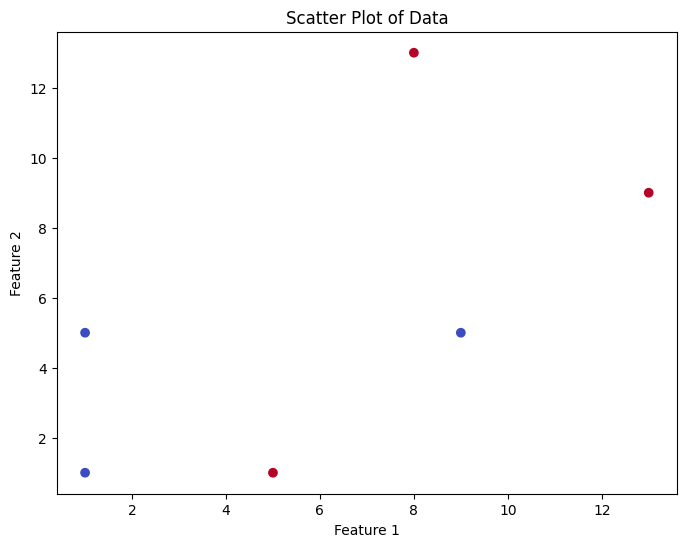

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 

In [26]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, Y)

SVC(kernel='linear')

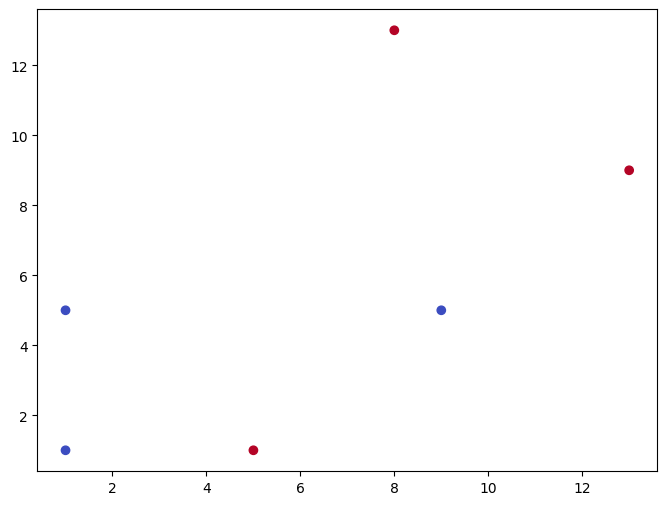

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [29]:
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

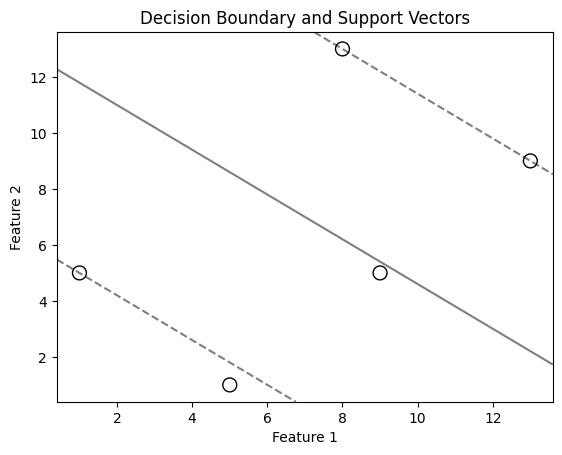

In [30]:
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## EXERCISE 2

Given a binary dataset:

- **Class0**: 
    ```
    | Colonne 1 | Colonne 2 |
    |-----------|-----------|
    |     2     |     2     |
    |     3     |     3     |
    |     4     |     4     |
    |     5     |     5     |
    |     4     |     6     |
    |     3     |     7     |
    |     4     |     8     |
    |     5     |     9     |
    |     6     |     10    |
    ```

- **Class1**: 
    ```
    | Colonne 1 | Colonne 2 |
    |-----------|-----------|
    |     6     |     2     |
    |     7     |     3     |
    |     8     |     4     |
    |     9     |     5     |
    |     8     |     6     |
    |     7     |     7     |
    |     7     |     8     |
    |     7     |     9     |
    |     8     |     10    |
    ```

### Tasks:

- **Sketch the points in a scatter plot.**
   
- **Indicate the support vectors and the decision boundary on the plot you would get using a SVM with linear kernel and a high cost of misclassifying training data (use the SVM module from the sklearn library).**

- **What is the error rate of the linear SVM on the training dataset?**

In [31]:
class0 = np.array([[2, 2], [3, 3], [4, 4], [5, 5], [4, 6], [3, 7], [4, 8], [5, 9], [6, 10]])
class1 = np.array([[6, 2], [7, 3], [8, 4], [9, 5], [8, 6], [7, 7], [7, 8], [7, 9], [8, 10]])

In [32]:
X = np.concatenate((class0, class1))

In [33]:
y = np.concatenate((np.zeros(class0.shape[0]), np.ones(class1.shape[0])))

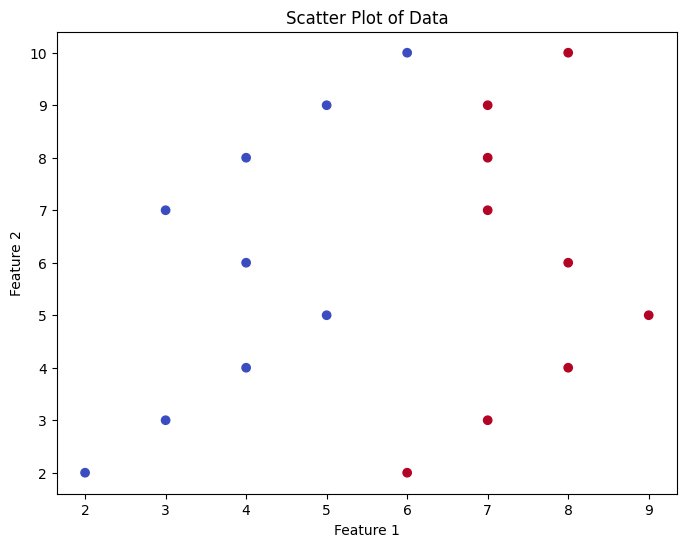

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [35]:
svm_linear_high_cost = SVC(kernel='linear', C=1000)
svm_linear_high_cost.fit(X, y)

SVC(C=1000, kernel='linear')

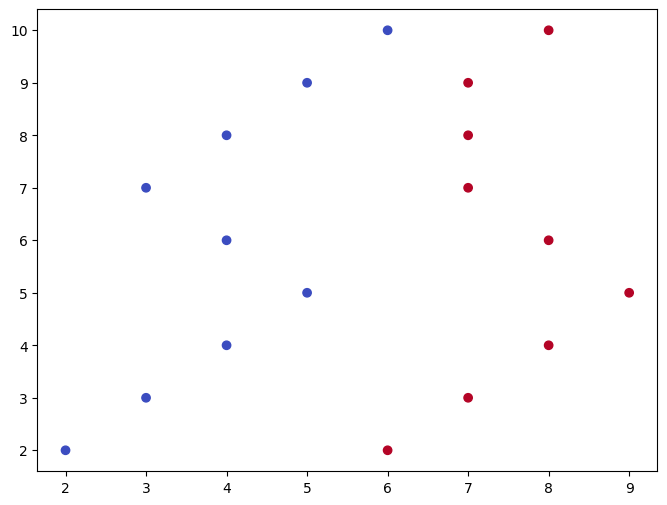

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [37]:
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_linear_high_cost.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

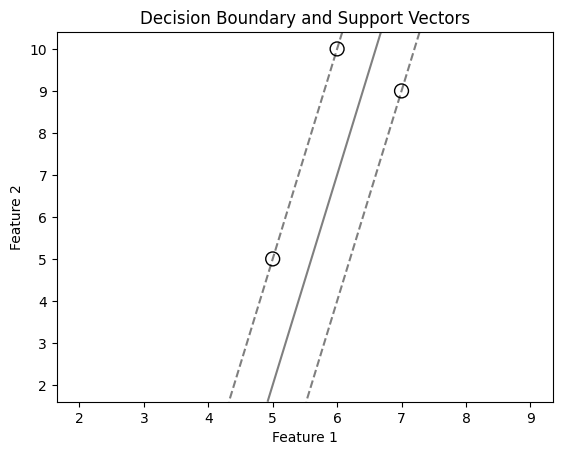

In [38]:
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_linear_high_cost.support_vectors_[:, 0], svm_linear_high_cost.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [39]:
error_rate = 1.0 - svm_linear_high_cost.score(X, y)
print("Taux d'erreur sur l'ensemble d'entraînement:", error_rate)

Taux d'erreur sur l'ensemble d'entraînement: 0.0
